### Roller coaster analysis

Write up can be found on ministryofdata.fandom.com

Data sources used:
* https://www.kaggle.com/nolanbconaway/rollercoaster-tycoon-rides
* http://www.math.montana.edu/courses/s216/

In [1]:
import pandas as pd

import seaborn as sns
sns.set(style="ticks")

import matplotlib.pyplot as plt

from scipy.stats import f, mannwhitneyu, shapiro, ttest_ind

import numpy as np

from scipy.stats import pearsonr

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
df_rct = pd.read_csv('./data/rollercoasters.csv')
df_rct.head()

,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,...,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,...,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,...,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,...,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
4,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,...,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0


In [4]:
df_rct['rollercoaster_type'].unique()

array(['Bobsleigh Coaster ', 'Dinghy Slide', 'Wild Mouse',
       'Wooden Roller Coaster ', 'Junior Roller Coaster',
       'Side-Friction Roller Coaster', 'Wooden Wild Mouse',
       'Stand Up Roller Coaster', 'Compact Inverted Coaster',
       'Looping Roller Coaster', 'Vertical Drop Coaster',
       'Inverted Roller Coaster', 'Spinning Wild Mouse',
       'Suspended Swinging Coaster', 'Mini Roller Coaster',
       'Virginia Reel', 'Heartline Twister Coaster',
       'Lay-down Roller Coaster', 'Spiral Coaster', 'Mine Train Coaster',
       'Corkscrew Roller Coaster', 'Stand Up Twister Roller Coaster',
       'Hypercoaster', 'Twister Coaster', 'Air Powered Vertical Coaster',
       'Floorless Roller Coaster', 'Giga Coaster', 'Water Coaster',
       'Reverse Freefall Coaster', 'Inverted Hairpin Coaster',
       'Hyper-Twister Roller Coaster', 'Reverser Roller Coaster',
       'Inverted Impulse Coaster'], dtype=object)

In [5]:
df_rct.columns

Index(['park_id', 'theme', 'rollercoaster_type', 'custom_design', 'excitement',
       'excitement_rating', 'intensity', 'intensity_rating', 'nausea',
       'nausea_rating', 'max_speed', 'avg_speed', 'ride_time', 'ride_length',
       'max_pos_gs', 'max_neg_gs', 'max_lateral_gs', 'total_air_time', 'drops',
       'highest_drop_height', 'inversions'],
      dtype='object')

In [6]:
df_rct.describe()

,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,21.740741,0.746032,6.495608,6.914603,4.430212,45.470899,14.296296,73.158730,2042.730159,3.423862,-1.318307,1.991952,1.979947,5.560847,57.359788,0.380952
std,11.328343,0.436436,1.157852,3.127408,1.446899,9.381708,4.693481,21.516352,814.490995,0.847993,4.053789,0.552003,1.759474,2.366151,30.056112,1.357743
min,0.000000,0.000000,2.460000,1.930000,1.330000,29.000000,1.000000,12.000000,620.000000,2.140000,-56.000000,0.000000,0.000000,1.000000,9.000000,-1.000000
25%,12.000000,0.000000,6.010000,5.660000,3.320000,39.000000,12.000000,60.000000,1561.000000,2.800000,-1.480000,1.650000,0.960000,4.000000,42.000000,0.000000
50%,21.000000,1.000000,6.610000,6.720000,4.270000,45.000000,14.000000,72.000000,1876.000000,3.240000,-1.070000,1.980000,1.620000,5.000000,52.000000,0.000000
75%,30.000000,1.000000,7.190000,7.750000,5.240000,50.000000,16.000000,84.000000,2385.000000,3.930000,-0.660000,2.420000,2.410000,6.000000,68.000000,1.000000
max,41.000000,1.000000,9.480000,44.940000,9.850000,89.000000,44.000000,186.000000,7497.000000,6.260000,1.890000,3.320000,13.680000,15.000000,239.000000,9.000000


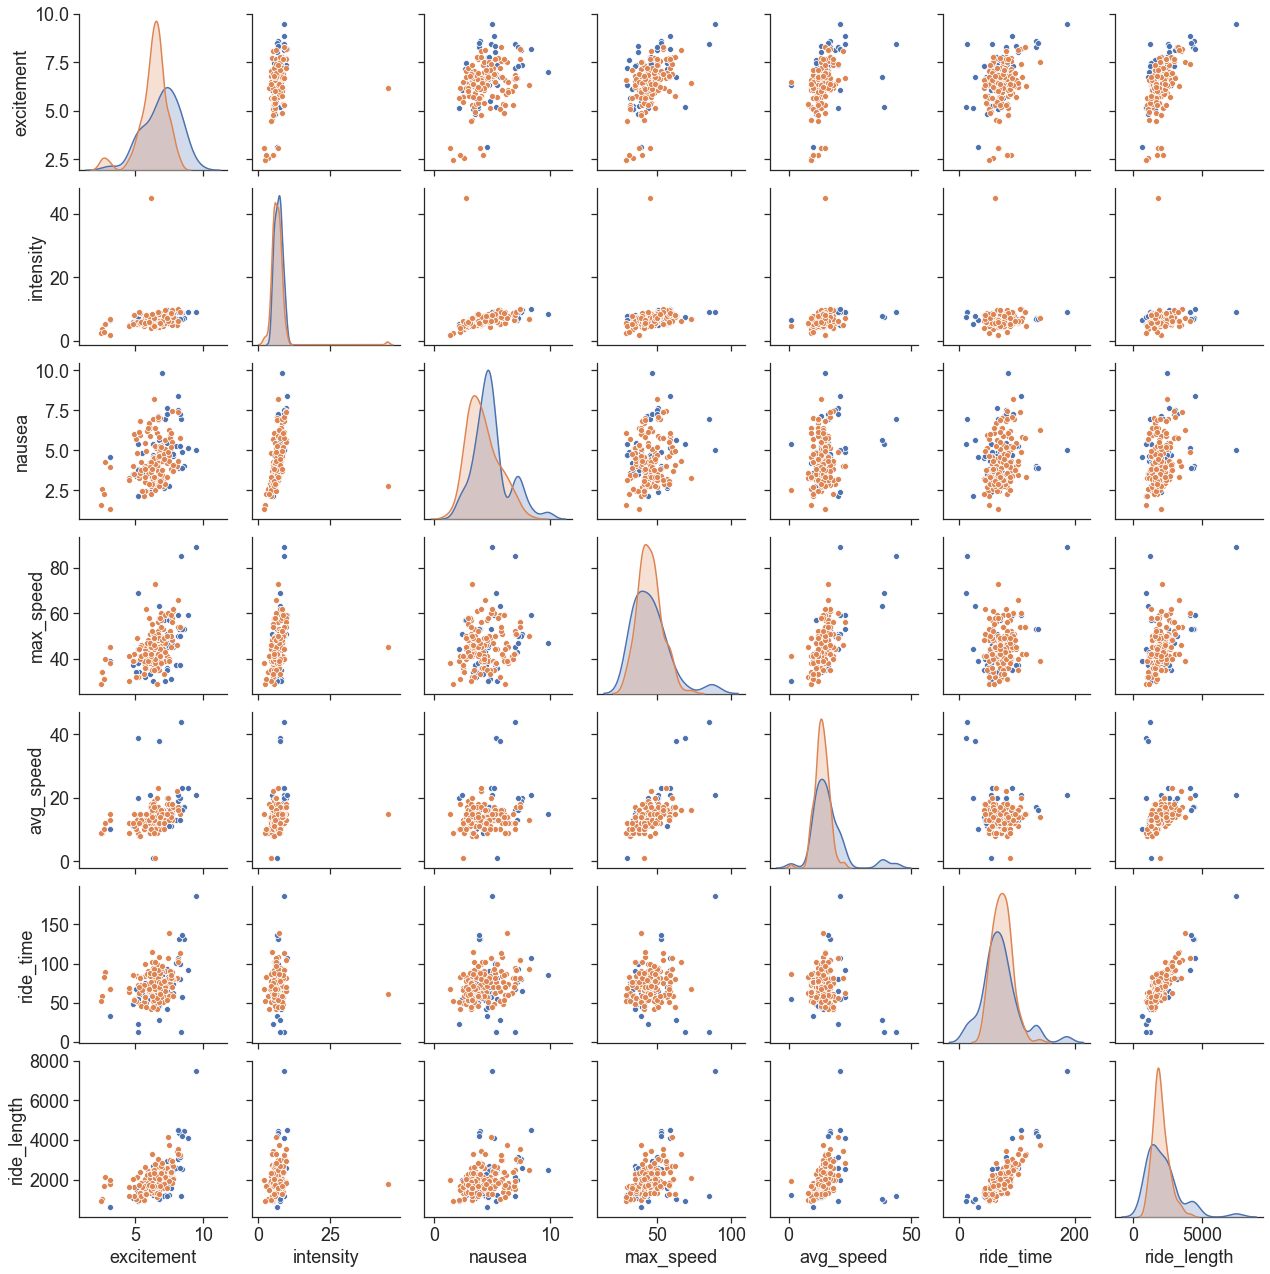

In [7]:


g = sns.pairplot(df_rct, vars=['excitement',
       'intensity', 'nausea',
       'max_speed', 'avg_speed', 'ride_time', 'ride_length'], hue="custom_design")
g._legend.remove()
plt.savefig('images/rtc_compare_metrics.png', type='png', bbox_inches='tight')

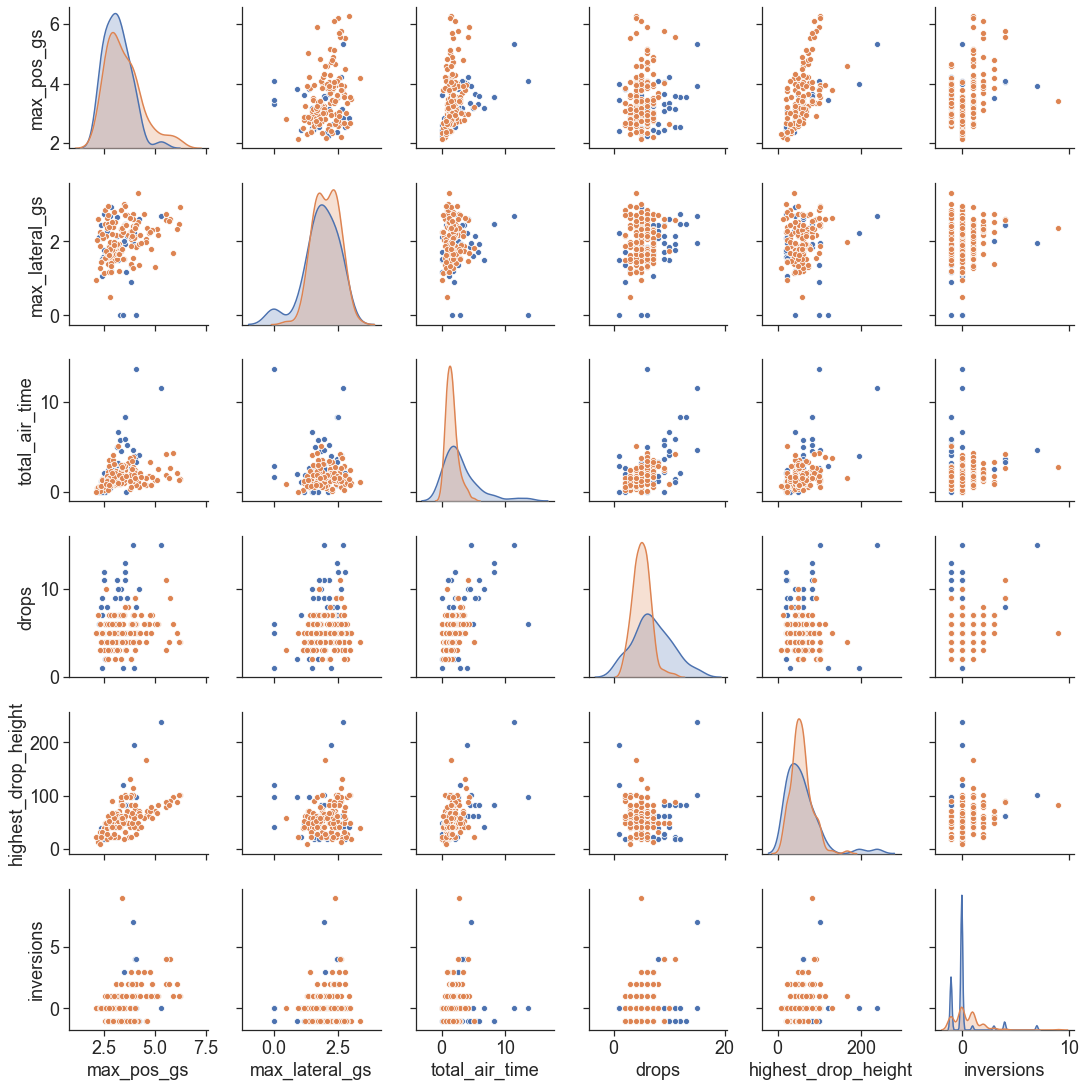

In [8]:
g = sns.pairplot(df_rct, vars=[
       'max_pos_gs', 'max_lateral_gs', 'total_air_time', 'drops',
       'highest_drop_height', 'inversions'], hue="custom_design")
g._legend.remove()
plt.savefig('images/rtc_compare_metrics2.png', type='png', bbox_inches='tight')

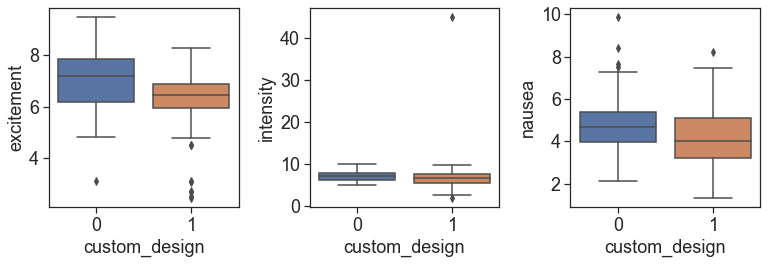

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(11,4))

sns.boxplot(x="custom_design", y="excitement",
                 data=df_rct, dodge=False, ax=axs[0])

sns.boxplot(x="custom_design", y="intensity",
                 data=df_rct, dodge=False, ax=axs[1])

sns.boxplot(x="custom_design", y="nausea",
                 data=df_rct, dodge=False, ax=axs[2])
plt.tight_layout()
plt.savefig('images/rtc_custom_design.png', type='png', bbox_inches='tight')

In [10]:
df_rct.corr()

,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
park_id,1.000000,0.310445,0.298549,0.157398,0.126889,0.432776,0.191632,0.124362,0.197748,0.406313,-0.054015,0.086959,0.113863,0.063200,0.360961,0.532112
custom_design,0.310445,1.000000,-0.239794,-0.046839,-0.217657,-0.026497,-0.253902,0.056428,-0.105567,0.168235,-0.049573,0.159978,-0.351835,-0.360969,-0.029897,0.101306
excitement,0.298549,-0.239794,1.000000,0.235240,0.345991,0.477766,0.361271,0.355802,0.565303,0.312144,0.003182,0.163699,0.447408,0.469728,0.452014,0.210714
intensity,0.157398,-0.046839,0.235240,1.000000,0.247215,0.197105,0.144032,0.015589,0.109194,0.200340,0.001733,0.224180,0.079072,0.058700,0.200903,0.113378
nausea,0.126889,-0.217657,0.345991,0.247215,1.000000,0.167917,0.196050,0.206411,0.270911,0.180582,-0.021071,0.219954,0.190699,0.302016,0.137655,0.282200
max_speed,0.432776,-0.026497,0.477766,0.197105,0.167917,1.000000,0.606127,0.131513,0.434851,0.637844,-0.090397,0.115820,0.485070,0.029014,0.931358,0.227205
avg_speed,0.191632,-0.253902,0.361271,0.144032,0.196050,0.606127,1.000000,-0.165331,0.287457,0.300507,-0.024402,-0.121442,0.499366,0.079792,0.509859,0.142455
ride_time,0.124362,0.056428,0.355802,0.015589,0.206411,0.131513,-0.165331,1.000000,0.833730,0.082425,-0.014299,0.120749,0.261850,0.478848,0.152404,0.107166
ride_length,0.197748,-0.105567,0.565303,0.109194,0.270911,0.434851,0.287457,0.833730,1.000000,0.269295,-0.022417,0.158761,0.486936,0.561852,0.409570,0.233971
max_pos_gs,0.406313,0.168235,0.312144,0.200340,0.180582,0.637844,0.300507,0.082425,0.269295,1.000000,-0.025564,0.280626,0.280952,0.125526,0.582848,0.390298


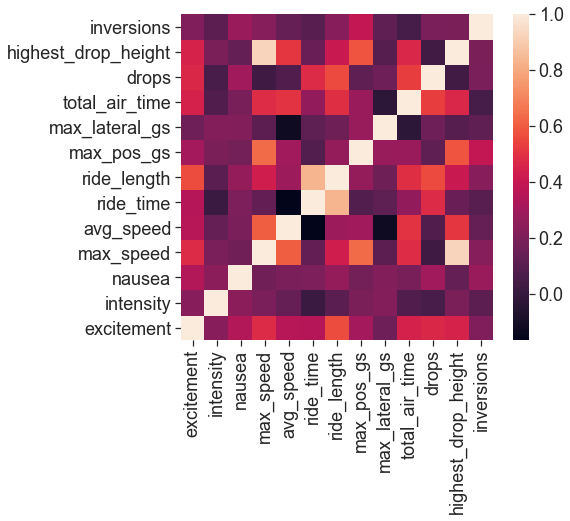

In [11]:
Fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(df_rct[['excitement',
       'intensity', 'nausea',
       'max_speed', 'avg_speed', 'ride_time', 'ride_length',
       'max_pos_gs', 'max_lateral_gs', 'total_air_time', 'drops',
       'highest_drop_height', 'inversions']].corr())

plt.ylim(0,13)
plt.savefig('images/excitement.png', type='png', bbox_inches='tight')

In [12]:
df_rc = pd.read_csv('./data/RollerCoasters_real.csv')
df_rc.head()

,Age_Group,Coaster,Park,City,State,Type,Design,Year_Opened,Top_Speed,Max_Height,Drop,Length,Duration,Inversions,Num_of_Inversions
0,1:older,Zippin Pippin,Libertyland,Memphis,Tennessee,Wooden,Sit Down,1915,40.0,70.0,70.0,2865.0,90.0,N,0.0
1,1:older,Jack Rabbit,Kennywood Park,West Mifflin,Pennsylvania,Wooden,Sit Down,1921,45.0,40.0,70.0,2132.0,96.0,N,0.0
2,1:older,Thunderhawk,Dorney Park,Allentown,Pennsylvania,Wooden,Sit Down,1923,45.0,80.0,65.0,2767.0,78.0,N,0.0
3,1:older,Giant Dipper,Santa Cruz Beach Boardwalk,Santa Cruz,California,Wooden,Sit Down,1924,55.0,70.0,65.0,2640.0,112.0,N,0.0
4,1:older,Thunderbolt,Kennywood Park,West Mifflin,Pennsylvania,Wooden,Sit Down,1924,55.0,70.0,95.0,2887.0,101.0,N,0.0


In [13]:
df_rc['Type'].unique()

array(['Wooden', 'Steel'], dtype=object)

In [14]:
df_rc.describe()

,Year_Opened,Top_Speed,Max_Height,Drop,Length,Duration,Num_of_Inversions
count,157.000000,146.000000,152.000000,154.000000,154.000000,129.000000,156.000000
mean,1989.796178,58.643836,126.960526,117.941558,3178.305195,125.666667,1.647436
std,18.974591,14.030872,64.587625,63.101975,1425.923979,41.416206,2.282626
min,1915.000000,23.000000,18.000000,9.000000,200.000000,28.000000,0.000000
25%,1989.000000,50.000000,83.750000,76.500000,2400.000000,100.000000,0.000000
50%,1997.000000,56.500000,112.500000,100.500000,2935.000000,120.000000,0.000000
75%,2000.000000,66.000000,160.250000,145.500000,3984.500000,150.000000,3.000000
max,2016.000000,120.000000,420.000000,400.000000,7359.000000,250.000000,7.000000


In [15]:
df_rct['origin'] = 'Game'
df_rct = df_rct[['origin', 'max_speed', 'ride_time', 'ride_length', 'inversions', 'rollercoaster_type']]

df_rct.head()

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type
0,Game,39,63,1496,0,Bobsleigh Coaster
1,Game,37,48,1079,0,Dinghy Slide
2,Game,31,70,1591,0,Wild Mouse
3,Game,47,79,2401,-1,Wooden Roller Coaster
4,Game,34,51,1279,0,Junior Roller Coaster


In [16]:
df_rc['origin'] = 'Real'
df_rc = df_rc[['origin', 'Top_Speed', 'Duration', 'Length', 'Num_of_Inversions', 'Type']]

df_rc.rename({'Top_Speed': 'max_speed',
              'Duration': 'ride_time',
              'Length': 'ride_length',
              'Num_of_Inversions': 'inversions',
              'Type': 'rollercoaster_type'}, axis='columns', inplace=True)

df_rc.head()

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type
0,Real,40.0,90.0,2865.0,0.0,Wooden
1,Real,45.0,96.0,2132.0,0.0,Wooden
2,Real,45.0,78.0,2767.0,0.0,Wooden
3,Real,55.0,112.0,2640.0,0.0,Wooden
4,Real,55.0,101.0,2887.0,0.0,Wooden


In [17]:
all_rc_data = pd.concat([df_rct, df_rc])

all_rc_data.head()

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type
0,Game,39.0,63.0,1496.0,0.0,Bobsleigh Coaster
1,Game,37.0,48.0,1079.0,0.0,Dinghy Slide
2,Game,31.0,70.0,1591.0,0.0,Wild Mouse
3,Game,47.0,79.0,2401.0,-1.0,Wooden Roller Coaster
4,Game,34.0,51.0,1279.0,0.0,Junior Roller Coaster


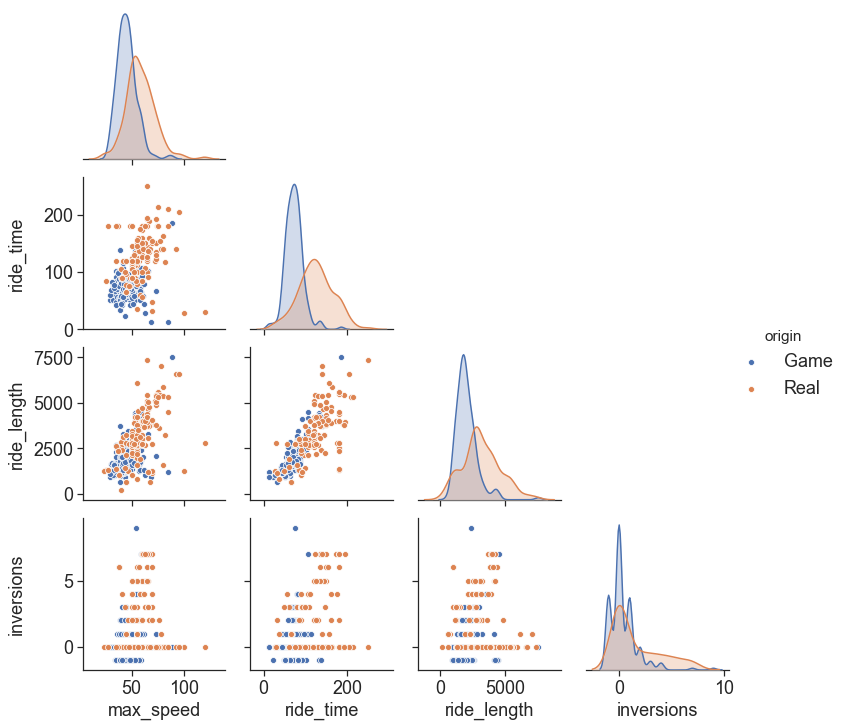

In [18]:
plot = sns.pairplot(all_rc_data.drop('rollercoaster_type', axis=1), hue="origin", corner=True,
            )
for ax in plot.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.4,0.5)
plt.savefig('images/rtc_real_compare_metrics.png', type='png', bbox_inches='tight')

In [19]:
def check_statistical_significance(group_a, group_b, alpha=0.05):

    # normality
    normality_group_a, normality_pvalue_a = shapiro(group_a)
    normality_group_b, normality_pvalue_b = shapiro(group_b)
    print('Shapiro group A p-value: ', normality_pvalue_a)
    print('Shapiro group B p-value: ', normality_pvalue_b)

    # variance
    F = np.var(group_a) / np.var(group_b)
    critical_value_group_a = len(group_a) - 1
    critical_value_group_b = len(group_b) - 1
    f_pvalue = f.cdf(F, critical_value_group_a, critical_value_group_b)
    print('F test p-value: ', f_pvalue)

    if normality_pvalue_a > alpha and normality_pvalue_b > alpha:
        if f_pvalue > alpha:
            # T-test
            ttest_pvalue = ttest_ind(group_a, group_b).pvalue
            print('T-test p-value: ', ttest_pvalue)
            print('Statistical significance: ', ttest_pvalue <= alpha)
        else:
            # Welch's test
            welch_pvalue = ttest_ind(group_a, group_b, equal_var=False).pvalue
            print('Welch p-value: ', welch_pvalue)
            print('Statistical significance: ', welch_pvalue <= alpha)
    else:
        # Mann-Whitney U test
        mannwhitneyu_pvalue = mannwhitneyu(group_a, group_b).pvalue
        print('Mann-Whitney U test: ', mannwhitneyu_pvalue)
        print('Statistical significance: ', mannwhitneyu_pvalue <= alpha)

In [20]:
check_statistical_significance(all_rc_data[all_rc_data['origin'] == 'Game']['max_speed'],
                              all_rc_data[all_rc_data['origin'] == 'Real']['max_speed'])

Shapiro group A p-value:  2.8446694955164276e-07
Shapiro group B p-value:  1.0
F test p-value:  8.107699432738919e-08
Mann-Whitney U test:  6.2749383869113655e-25
Statistical significance:  True


In [21]:
check_statistical_significance(all_rc_data[all_rc_data['origin'] == 'Game']['ride_time'],
                              all_rc_data[all_rc_data['origin'] == 'Real']['ride_time'])

Shapiro group A p-value:  5.492875061463565e-07
Shapiro group B p-value:  1.0
F test p-value:  2.0873746791150333e-17
Mann-Whitney U test:  9.688843683145429e-38
Statistical significance:  True


In [22]:
check_statistical_significance(all_rc_data[all_rc_data['origin'] == 'Game']['ride_length'],
                              all_rc_data[all_rc_data['origin'] == 'Real']['ride_length'])

Shapiro group A p-value:  1.005997802422387e-12
Shapiro group B p-value:  1.0
F test p-value:  2.2471364416158586e-13
Mann-Whitney U test:  2.1815339742320217e-18
Statistical significance:  True


In [23]:
check_statistical_significance(all_rc_data[(all_rc_data['origin'] == 'Game') & 
                                          (all_rc_data['inversions'] != -1)]['inversions'],
                              all_rc_data[(all_rc_data['origin'] == 'Real') & 
                                          (all_rc_data['inversions'] != -1)]['inversions'])

Shapiro group A p-value:  7.19535959846807e-18
Shapiro group B p-value:  1.0
F test p-value:  6.5924135470160516e-12
Mann-Whitney U test:  0.025449180988405977
Statistical significance:  True


In [24]:
metric = 'max_speed'

all_rc_data[(all_rc_data['origin'] == 'Game') & 
            ((all_rc_data[metric] < all_rc_data[all_rc_data['origin'] == 'Real'][metric].min()) |
            (all_rc_data[metric] > all_rc_data[all_rc_data['origin'] == 'Real'][metric].max()))]

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type


In [25]:
metric = 'ride_time'

all_rc_data[(all_rc_data['origin'] == 'Game') & 
            ((all_rc_data[metric] < all_rc_data[all_rc_data['origin'] == 'Real'][metric].min()) |
            (all_rc_data[metric] > all_rc_data[all_rc_data['origin'] == 'Real'][metric].max()))]

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type
43,Game,44.0,23.0,931.0,-1.0,Corkscrew Roller Coaster
66,Game,85.0,13.0,1168.0,0.0,Air Powered Vertical Coaster
90,Game,69.0,12.0,918.0,0.0,Reverse Freefall Coaster


In [26]:
print(all_rc_data[all_rc_data['origin'] == 'Real'][metric].min(),
     all_rc_data[all_rc_data['origin'] == 'Real'][metric].max())

28.0 250.0


In [27]:
metric = 'ride_length'

all_rc_data[(all_rc_data['origin'] == 'Game') & 
            ((all_rc_data[metric] < all_rc_data[all_rc_data['origin'] == 'Real'][metric].min()) |
            (all_rc_data[metric] > all_rc_data[all_rc_data['origin'] == 'Real'][metric].max()))]

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type
85,Game,89.0,186.0,7497.0,0.0,Hypercoaster


In [28]:
print(all_rc_data[all_rc_data['origin'] == 'Real'][metric].min(),
     all_rc_data[all_rc_data['origin'] == 'Real'][metric].max())

200.0 7359.0


In [29]:
metric = 'inversions'

all_rc_data[(all_rc_data['origin'] == 'Game') & (all_rc_data['inversions'] != -1) &
            ((all_rc_data[metric] < all_rc_data[all_rc_data['origin'] == 'Real'][metric].min()) |
            (all_rc_data[metric] > all_rc_data[all_rc_data['origin'] == 'Real'][metric].max()))]

,origin,max_speed,ride_time,ride_length,inversions,rollercoaster_type
172,Game,54.0,75.0,2355.0,9.0,Spiral Coaster


In [30]:
print(all_rc_data[all_rc_data['origin'] == 'Real'][metric].min(),
     all_rc_data[all_rc_data['origin'] == 'Real'][metric].max())

0.0 7.0


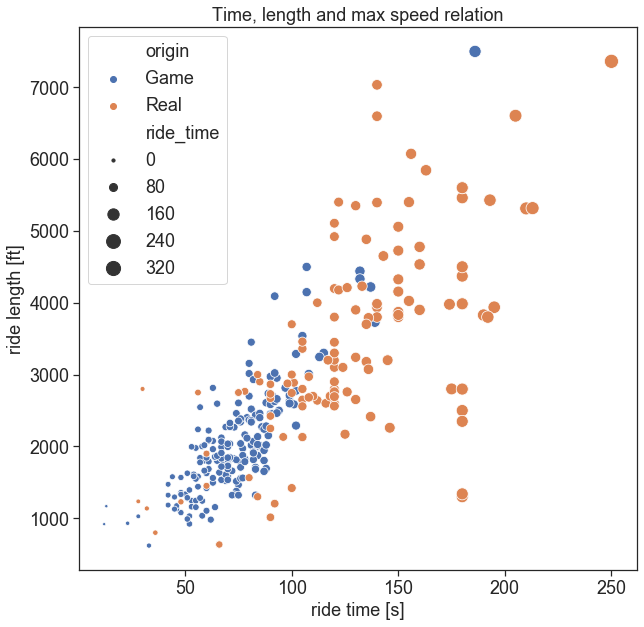

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x="ride_time", y="ride_length",
                     hue="origin", size="ride_time",
                     sizes=(10, 200),
                     data=all_rc_data,
                     ax=ax)

ax.set_xlabel('ride time [s]')
ax.set_ylabel('ride length [ft]')
ax.set_title('Time, length and max speed relation')
plt.savefig('images/rtc_real_ride_length.png', type='png', bbox_inches='tight')

In [32]:
pearsonr(all_rc_data[all_rc_data['origin'] == 'Real'].dropna()['ride_time'],
        all_rc_data[all_rc_data['origin'] == 'Real'].dropna()['ride_length'])

(0.651306803499581, 4.562753657664855e-16)

In [33]:
pearsonr(all_rc_data[all_rc_data['origin'] == 'Game'].dropna()['ride_time'],
        all_rc_data[all_rc_data['origin'] == 'Game'].dropna()['ride_length'])

(0.8337304528785842, 4.085719515192891e-50)

In [34]:
pearsonr(all_rc_data.dropna()['ride_time'],
        all_rc_data.dropna()['ride_length'])

(0.7920867809811725, 3.2641281854283645e-68)

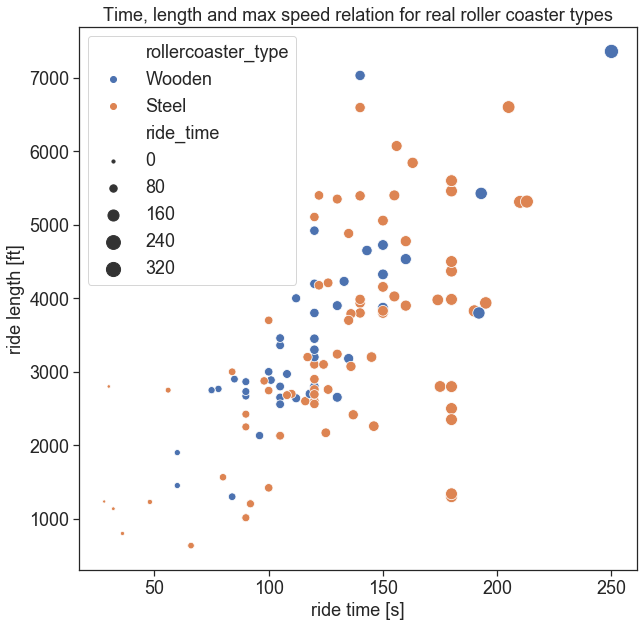

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x="ride_time", y="ride_length",
                     hue="rollercoaster_type", size="ride_time",
                     sizes=(10, 200),
                     data=all_rc_data[all_rc_data['origin'] == 'Real'],
                     ax=ax)

ax.set_xlabel('ride time [s]')
ax.set_ylabel('ride length [ft]')
ax.set_title('Time, length and max speed relation for real roller coaster types')
plt.savefig('images/wooden_steel_ride_length.png', type='png', bbox_inches='tight')

In [36]:
pearsonr(all_rc_data[(all_rc_data['origin'] == 'Real') & 
                    (all_rc_data['rollercoaster_type'] == 'Wooden')].dropna()['ride_time'],
        all_rc_data[(all_rc_data['origin'] == 'Real') & 
                    (all_rc_data['rollercoaster_type'] == 'Wooden')].dropna()['ride_length'])

(0.7911975032971343, 2.034494657228243e-09)

In [37]:
pearsonr(all_rc_data[(all_rc_data['origin'] == 'Real') & 
                    (all_rc_data['rollercoaster_type'] == 'Steel')].dropna()['ride_time'],
        all_rc_data[(all_rc_data['origin'] == 'Real') & 
                    (all_rc_data['rollercoaster_type'] == 'Steel')].dropna()['ride_length'])

(0.6303288066523505, 1.7094492196252762e-10)

In [38]:
all_rc_data[all_rc_data['origin'] == 'Game']['rollercoaster_type'].unique()

array(['Bobsleigh Coaster ', 'Dinghy Slide', 'Wild Mouse',
       'Wooden Roller Coaster ', 'Junior Roller Coaster',
       'Side-Friction Roller Coaster', 'Wooden Wild Mouse',
       'Stand Up Roller Coaster', 'Compact Inverted Coaster',
       'Looping Roller Coaster', 'Vertical Drop Coaster',
       'Inverted Roller Coaster', 'Spinning Wild Mouse',
       'Suspended Swinging Coaster', 'Mini Roller Coaster',
       'Virginia Reel', 'Heartline Twister Coaster',
       'Lay-down Roller Coaster', 'Spiral Coaster', 'Mine Train Coaster',
       'Corkscrew Roller Coaster', 'Stand Up Twister Roller Coaster',
       'Hypercoaster', 'Twister Coaster', 'Air Powered Vertical Coaster',
       'Floorless Roller Coaster', 'Giga Coaster', 'Water Coaster',
       'Reverse Freefall Coaster', 'Inverted Hairpin Coaster',
       'Hyper-Twister Roller Coaster', 'Reverser Roller Coaster',
       'Inverted Impulse Coaster'], dtype=object)

In [39]:
all_rc_data[(all_rc_data['origin'] == 'Game') &
           (all_rc_data['rollercoaster_type'].str.contains('Wooden'))].count()

origin                32
max_speed             32
ride_time             32
ride_length           32
inversions            32
rollercoaster_type    32
dtype: int64

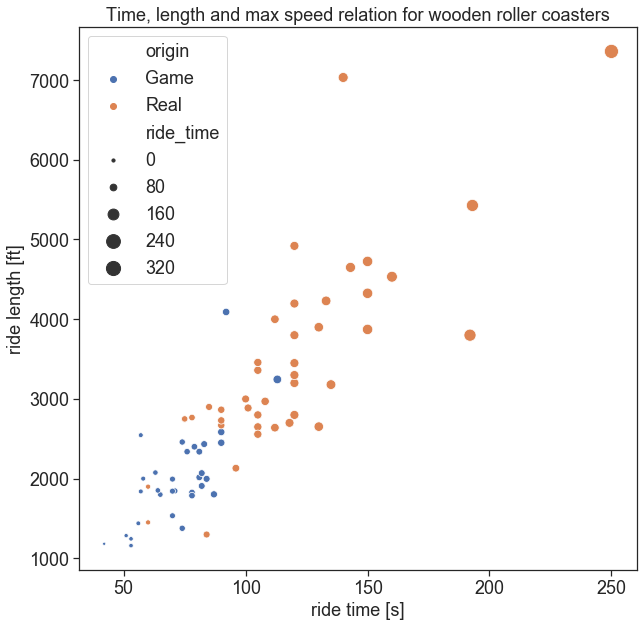

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(x="ride_time", y="ride_length",
                     hue="origin", size="ride_time",
                     sizes=(10, 200),
                     data=all_rc_data[all_rc_data['rollercoaster_type'].str.contains('Wooden')],
                     ax=ax)

ax.set_xlabel('ride time [s]')
ax.set_ylabel('ride length [ft]')
ax.set_title('Time, length and max speed relation for wooden roller coasters')
plt.savefig('images/rtc_real_wooden_ride_length.png', type='png', bbox_inches='tight')